In [57]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore',category=ConvergenceWarning)
warnings.simplefilter(action='ignore',category=FitFailedWarning)

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
print('How many Passengers were travelling :', len(titanic))

How many Passengers were travelling : 887


In [5]:
# check there is any null values
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:

titanic['Family_size']=titanic['Siblings/Spouses Aboard']+titanic['Parents/Children Aboard'] + 1
titanic['IsAlone']=1 # take inital value
titanic['IsAlone'].loc[titanic['Family_size']>1]=0
titanic['Title']=titanic['Name'].str.split(',',expand=True)[0].str.split('.',expand=True)[0]
titanic['Farebin']=pd.qcut(titanic['Fare'],4) # fare divide into four bins.
titanic['Agebin']=pd.cut(titanic['Age'].astype(int),5) # Age divie into 5 bins.

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_size,IsAlone,Title,Farebin,Agebin
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,Mr,"(-0.001, 7.925]","(16.0, 32.0]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,Mrs,"(31.138, 512.329]","(32.0, 48.0]"
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,Miss,"(-0.001, 7.925]","(16.0, 32.0]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,Mrs,"(31.138, 512.329]","(32.0, 48.0]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,Mr,"(7.925, 14.454]","(32.0, 48.0]"


In [8]:
titanic.drop(['Name','Age','Fare'],axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
titanic['Sex']=label.fit_transform(titanic['Sex'])
titanic['Title']=label.fit_transform(titanic['Title'])
titanic['Farebin']=label.fit_transform(titanic['Farebin'])
titanic['Agebin']=label.fit_transform(titanic['Agebin'])


In [10]:
titanic

,Survived,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard,Family_size,IsAlone,Title,Farebin,Agebin
0,0,3,1,1,0,2,0,11,0,1
1,1,1,0,1,0,2,0,12,3,2
2,1,3,0,0,0,1,1,8,0,1
3,1,1,0,1,0,2,0,12,3,2
4,0,3,1,0,0,1,1,11,1,2
...,...,...,...,...,...,...,...,...,...,...
882,0,2,1,0,0,1,1,14,1,1
883,1,1,0,0,0,1,1,8,2,1
884,0,3,0,1,2,4,0,8,2,0
885,1,1,1,0,0,1,1,11,2,1


# Data analyzing

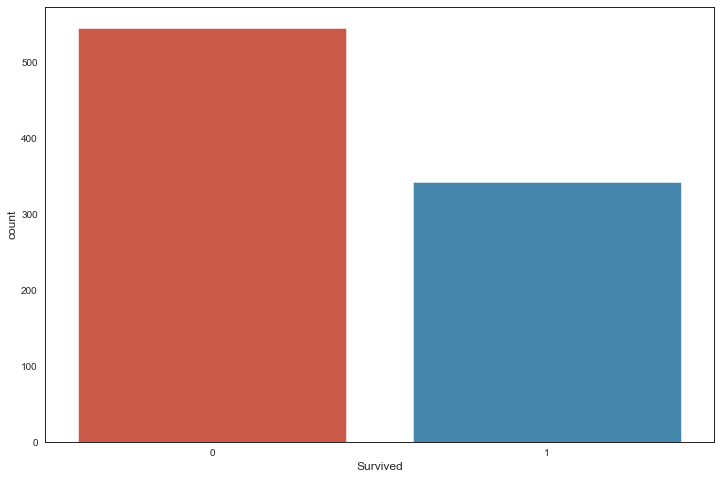

In [11]:
# lets check out the percentage of how many did survive and not
sns.countplot(x='Survived',data=titanic)


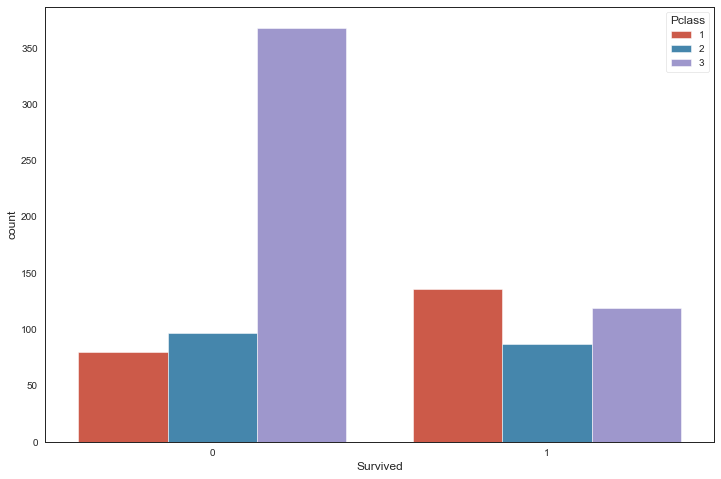

In [12]:
# lets check out the percentage of survived according to passenger class
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Survived                 887 non-null    int64
 1   Pclass                   887 non-null    int64
 2   Sex                      887 non-null    int32
 3   Siblings/Spouses Aboard  887 non-null    int64
 4   Parents/Children Aboard  887 non-null    int64
 5   Family_size              887 non-null    int64
 6   IsAlone                  887 non-null    int64
 7   Title                    887 non-null    int32
 8   Farebin                  887 non-null    int32
 9   Agebin                   887 non-null    int32
dtypes: int32(4), int64(6)
memory usage: 55.6 KB


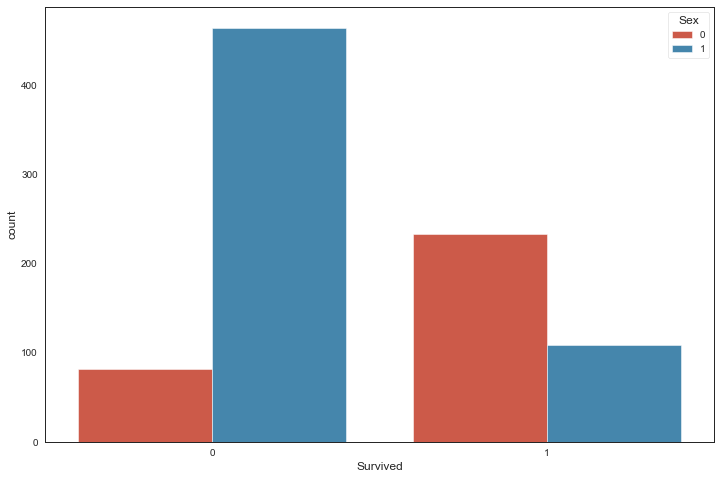

In [14]:
# lets check out the gender percentage did survive or not
sns.countplot(x='Survived',hue='Sex',data=titanic)

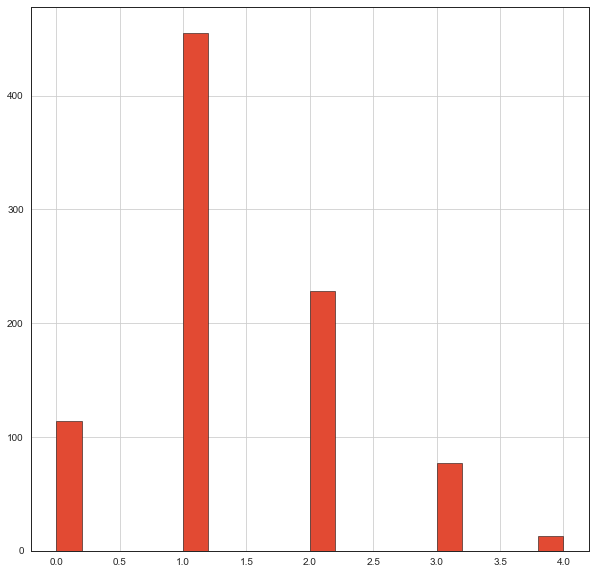

In [15]:
titanic['Agebin'].hist(bins=20,figsize=(10,10),edgecolor='black')

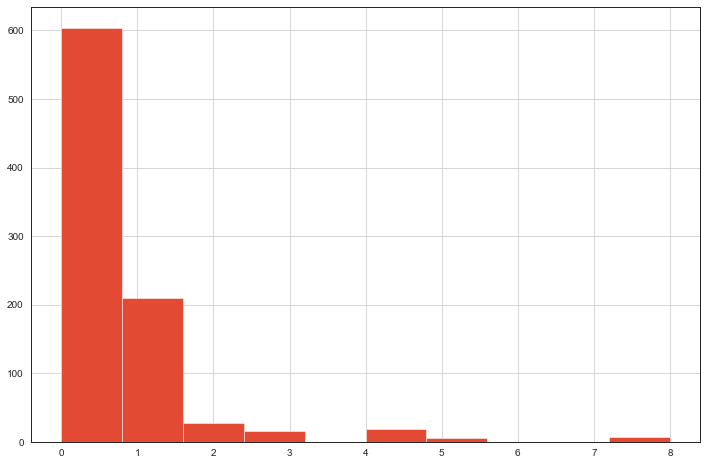

In [16]:
titanic['Siblings/Spouses Aboard'].hist()

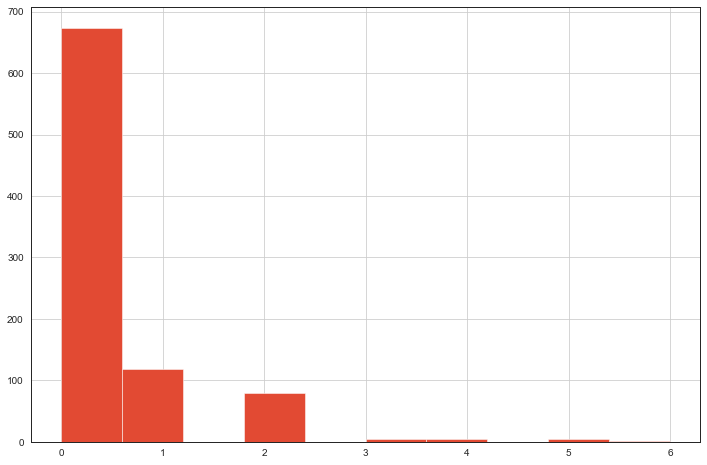

In [17]:
titanic['Parents/Children Aboard'].hist()

# Data Wrangling

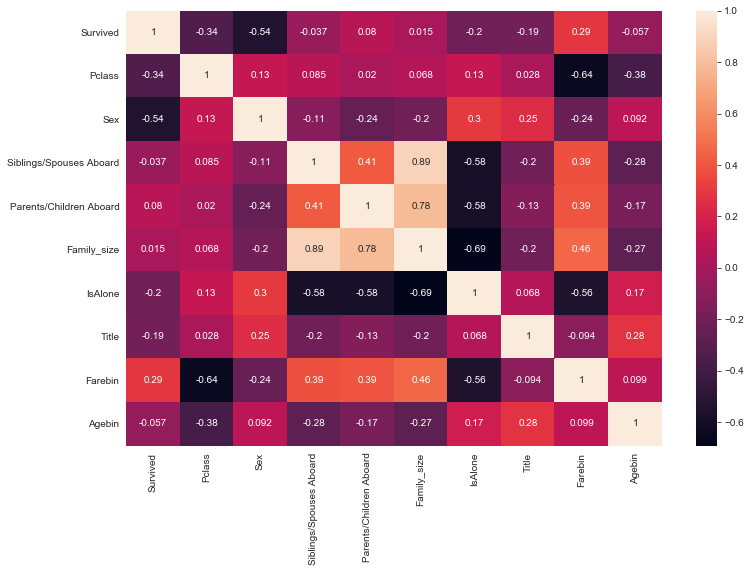

In [18]:
sns.heatmap(titanic.corr(),annot=True)

# Split the data

In [19]:
# create dummy variables
titanic=pd.get_dummies(titanic,columns=['Title','Farebin','Agebin'],drop_first=True)

In [20]:
X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']

In [21]:
X.head()

,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard,Family_size,IsAlone,Title_1,Title_2,Title_3,Title_4,...,Title_14,Title_15,Title_16,Farebin_1,Farebin_2,Farebin_3,Agebin_1,Agebin_2,Agebin_3,Agebin_4
0,3,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [23]:
X

,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard,Family_size,IsAlone,Title_1,Title_2,Title_3,Title_4,...,Title_14,Title_15,Title_16,Farebin_1,Farebin_2,Farebin_3,Agebin_1,Agebin_2,Agebin_3,Agebin_4
0,3,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
883,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
884,3,0,1,2,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
885,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
# clf=LogisticRegression(max_iter=10000)
# clf.fit(X_train,Y_train)

clf=RandomForestClassifier().fit(X_train,Y_train)

print('Accuracy for training Data {}'.format(clf.score(X_train,Y_train)))
print('Accuracy for testing Data {}'.format(clf.score(X_test,Y_test)))


Accuracy for training Data 0.8913963328631875
Accuracy for testing Data 0.8089887640449438


In [25]:
# Machine Learning Algorithm and Initialization
MLA=[
    # Ensemble Techniques
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    #Linear models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.PassiveAggressiveClassifier(),
    
     #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
     
    #Xgboost
    XGBClassifier()
    
]


# train_test split by model_selection
cv=model_selection.ShuffleSplit(n_splits=10,test_size=0.2,train_size=0.7,random_state=0)

# lets create a table to compare algotihm parameters
MLA_columns=['MLA Name','MLA Parameters','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']

MLA_table=pd.DataFrame(columns=MLA_columns)

# create a table for compare Predictions
MLA_predict=Y.copy(deep=True)

# lets add model perfoamnce through rows.
row_index=0
for alg in MLA:
    
    #set name and Parameters of algorithms.
    MLA_name=alg.__class__.__name__
    MLA_table.loc[row_index,'MLA Name']=MLA_name
    MLA_table.loc[row_index,'MLA Parameters']=str(alg.get_params())
    
    # cross_validation
    cv_results=model_selection.cross_validate(alg,X,Y,cv=cv)
    
#     MLA_table.loc[row_index,'MLA Train Accuracy Mean']=cv_results['train_score'].mean()
    MLA_table.loc[row_index,'MLA Test Accuracy Mean']=cv_results['test_score'].mean()
    MLA_table.loc[row_index,'MLA Time']=cv_results['fit_time'].mean()
    MLA_table.loc[row_index,'MLA Test Accuracy 3*STD']=cv_results['test_score'].std()*3
    
    alg.fit(X,Y)
    MLA_predict[MLA_name]=alg.predict(X)
    
    row_index+=1
    
MLA_table.sort_values(by=['MLA Test Accuracy Mean'],ascending=False,inplace=True)
    
    
    

In [54]:
MLA_table

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
17,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.83427,0.0971845,0.246303
13,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.830899,0.0809866,0.296327
12,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.830337,0.0848742,0.164577
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.82809,0.0707865,0.3742
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.825281,0.0844212,0.691977
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.824157,0.0621771,0.65239
11,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.822472,0.105037,0.00781276
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.82191,0.0686888,0.514615
14,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.819663,0.0981154,0.124456
7,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.819663,0.0700808,0.048992


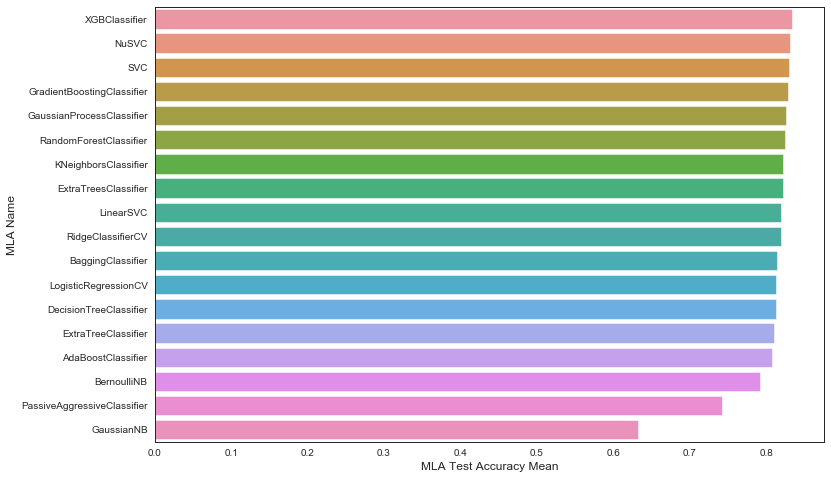

In [27]:
sns.barplot(MLA_table['MLA Test Accuracy Mean'],MLA_table['MLA Name'])

In [59]:
# XGBClassifier gives higher accuracy than anyone 
#lets tune the hyper parameters
clf =XGBClassifier(learning_rate=0.01)
clf_results=model_selection.cross_validate(clf,X,Y,cv=cv)
clf.fit(X,Y)

print('BEFORE DT Parameters: ', clf.get_params())

print("BEFORE DT Test w/bin score mean: {:.2f}". format(clf_results['test_score'].mean()*100))

print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(clf_results['test_score'].std()*100*3))

param_grid={
    'learning_rate':[.01, .03, .05, .1, .25],
    'max_depth':[2, 4, 6, 8, 10, None],
    'random_state':[0]
}

tune_model=model_selection.GridSearchCV(XGBClassifier(),param_grid=param_grid,scoring='roc_auc',cv=cv)
tune_model.fit(X,Y)

print('AFTER DT Parameters: ', tune_model.best_params_)

print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

BEFORE DT Parameters:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
BEFORE DT Test w/bin score mean: 82.87
BEFORE DT Test w/bin score 3*std: +/- 5.80
AFTER DT Parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'random_state': 0}
AFTER DT Test w/bin score mean: 87.62
AFTER DT Test w/bin score 3*std: +/- 8.56


In [ ]:
# we can see we got nearly 88% Accuracy by Hyper tunning Parameters.